 <font color=IndianRed><h1><u><b>DWDM Active Learning.</b></u></h1></font>

<font color=LightSeaGreen>
    <p>
        <b><u>Group no.</u></b> : 10<br/>
        <b><u>Subject</u></b> : DWDM<br/>
        <b><u>Roll no.'s</u></b> : PB09, PB10, PB11, PB36<br/>
        <b><u>ERP no.'s</u></b> : 1032180029, 1032180044, 1032180046, 1032181008<br/>
        <b><u>Name's</u></b> : Aditya Meshram, Tanaya Patole, Ahbaz Memon, Yashada Nikam<br/>
        <b><u>Trimester no.</u></b> : 08<br/>
        <b><u>Branch</u></b> : C.S.E MIT-WPU<br/>
        <b><u>Presented to</u></b> : Prof. Varsha Powar<br/>
    </p>
</font>

 <font color=SpringGreen><h1>Important Libraries</h1></font>

<font color=OliveDrab><h4>general explanation of each library is given below...</h4></font>

In [1]:
import time # for calculation of times
import numpy as np # for efficient list
import pandas as pd # for efficient tables
from matplotlib import pyplot as plt # for visualization
import seaborn as sns # for visualization
from mlxtend.frequent_patterns import apriori # machine learning xtend tool for apriori algorithm
from mlxtend.frequent_patterns import association_rules # machine learning xtend tool for association rules
from mlxtend.frequent_patterns import fpgrowth # machine learning xtend tool for fp growth algorithm

<font color=OliveDrab><h4>lets add some style to our plot</h4></font>

In [2]:
plt.style.use('fivethirtyeight')

<font color=SpringGreen><h1>Loading data from .txt file</h1></font>

<font color=OliveDrab><h4>fetching data by file pointer and adding into the list</h4></font>

In [3]:
path = 'Daily Products datasets.txt'
f = open(path, 'r') # opening file pointer and reading from path in only read mode

data = [] 
for line in f.readlines(): # iterating each line from file
    l = line.split(',') # spliting each line by ',' seperater
    l = l[:-1:1] # skipping last element of list which is -> '\n'
    data.append(l)
f.close() # closing file pointer
data

[['Lassi', 'Coffee Powder', 'Butter', 'Yougurt', 'Ghee', 'Cheese'],
 ['Ghee', 'Coffee Powder'],
 ['Lassi', 'Tea Powder', 'Butter', 'Cheese'],
 ['Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread'],
 ['Cheese', 'Yougurt', 'Coffee Powder', 'Sugar', 'Butter', 'Sweet'],
 ['Sugar', 'Tea Powder', 'Ghee', 'Sweet', 'Panner', 'Milk'],
 ['Sweet', 'Coffee Powder'],
 ['Butter', 'Ghee', 'Panner'],
 ['Sweet', 'Tea Powder', 'Butter', 'Yougurt', 'Sugar', 'Cheese'],
 ['Panner', 'Ghee'],
 ['Milk', 'Panner', 'Tea Powder', 'Sweet', 'Bread'],
 ['Ghee',
  'Coffee Powder',
  'Milk',
  'Yougurt',
  'Lassi',
  'Sugar',
  'Butter',
  'Panner'],
 ['Butter', 'Coffee Powder', 'Panner', 'Sweet', 'Ghee', 'Lassi'],
 ['Bread',
  'Lassi',
  'Coffee Powder',
  'Tea Powder',
  'Sweet',
  'Ghee',
  'Sugar',
  'Panner'],
 ['Milk', 'Sweet', 'Butter', 'Sugar', 'Lassi', 'Panner'],
 ['Bread', 'Coffee Powder', 'Tea Powder'],
 ['Butter', 'Ghee', 'Milk', 'Cheese'],
 ['Bread', 'Coffee Powder'],
 ['Cheese', 'Tea Po

<font color=SpringGreen><h1>Preprocessing for data</h1></font>

<font color=OliveDrab><h4>extracting unique entries from file </h4></font>

In [4]:
columns = set([]) # empty set since set skip the same entries
for l in data: # a list in data
    for e in l: # a element in list
        columns.add(e)
columns = list(columns) # convert set to list to easy iterate
columns = sorted(columns) # sort elements by alphabetical order
columns

['Bread',
 'Butter',
 'Cheese',
 'Coffee Powder',
 'Ghee',
 'Lassi',
 'Milk',
 'Panner',
 'Sugar',
 'Sweet',
 'Tea Powder',
 'Yougurt']

<font color=SpringGreen><h1>encoding/labelisation</h1></font>

<font color=OliveDrab><h4>not using inbuild encoder, below code does the same thing</h4></font>

In [5]:
bool_data = []
for l in data: # a list in data
    temp = []
    for c in columns: # every column in columns
        if c in l: # if column is in the list
            temp.append(True) # append the value True 
        else:
            temp.append(False) # append the value False
    bool_data.append(temp) 

<font color=OliveDrab><h4>transfering data to datafarame</h4></font>

In [6]:
data = pd.DataFrame(bool_data, columns = columns) # creating data frame

In [7]:
data.head()

,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,False,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,True,True,False,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,False,False,True,False
3,True,True,True,True,False,False,False,True,False,False,True,False
4,False,True,True,True,False,False,False,False,True,True,False,True


<font color=OliveDrab><h4>checking for remainig null entries</h4></font>

In [8]:
data.isnull().sum()

Bread            0
Butter           0
Cheese           0
Coffee Powder    0
Ghee             0
Lassi            0
Milk             0
Panner           0
Sugar            0
Sweet            0
Tea Powder       0
Yougurt          0
dtype: int64

<font color=OliveDrab><h4>checking for same datatypes</h4></font>

In [9]:
data.dtypes

Bread            bool
Butter           bool
Cheese           bool
Coffee Powder    bool
Ghee             bool
Lassi            bool
Milk             bool
Panner           bool
Sugar            bool
Sweet            bool
Tea Powder       bool
Yougurt          bool
dtype: object

<font color=SpringGreen><h1>Normalization</h1></font>

In [10]:
# no need because data is in boolean form

<font color=SpringGreen><h1>Visualization</h1></font>

<font color=OliveDrab><h4>lets look counts in pie</h4></font>

<AxesSubplot:ylabel='None'>

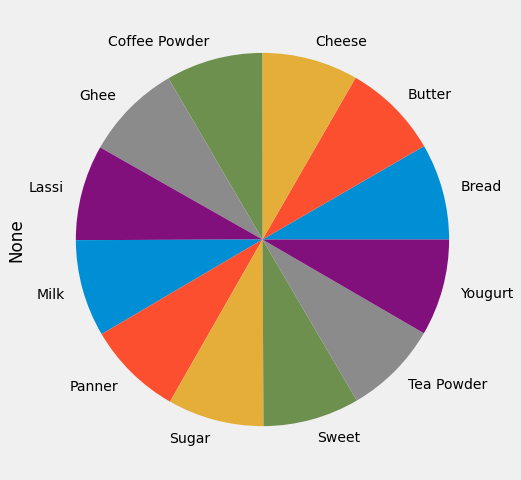

In [11]:
plt.figure(figsize = (8,8)) # figure size 
data.sum().plot.pie() # inbuild pie chart in pandas

<font color=SpringGreen><h1>Apriori cells</h1></font>

<font color=OliveDrab><h4>apr object is created for apriori</h4></font>

In [12]:
apr = apriori(df = data, min_support = 0.2, use_colnames = True)
apr

,support,itemsets
0,0.437809,(Bread)
1,0.437570,(Butter)
2,0.437171,(Cheese)
3,0.439805,(Coffee Powder)
4,0.439885,(Ghee)
5,0.433658,(Lassi)
6,0.441162,(Milk)
7,0.434616,(Panner)
8,0.437650,(Sugar)
9,0.437730,(Sweet)


<font color=OliveDrab><h4>lets see time required for apriori algorithm</h4></font>

In [13]:
%timeit -n 10 -r 1 apriori(df = data, min_support = 0.2, use_colnames = True)

8.54 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


<font color=OliveDrab><h4>collecting association rules</h4></font>

In [14]:
ar = association_rules(apr, min_threshold=0.45)
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheese),(Bread),0.437171,0.437809,0.201980,0.462016,1.055291,0.010582,1.044995
1,(Bread),(Cheese),0.437809,0.437171,0.201980,0.461342,1.055291,0.010582,1.044873
2,(Coffee Powder),(Bread),0.439805,0.437809,0.201820,0.458885,1.048140,0.009269,1.038949
3,(Bread),(Coffee Powder),0.437809,0.439805,0.201820,0.460977,1.048140,0.009269,1.039279
4,(Lassi),(Bread),0.433658,0.437809,0.200064,0.461340,1.053747,0.010204,1.043684
5,(Bread),(Lassi),0.437809,0.433658,0.200064,0.456966,1.053747,0.010204,1.042921
6,(Milk),(Bread),0.441162,0.437809,0.200942,0.455483,1.040369,0.007797,1.032458
7,(Bread),(Milk),0.437809,0.441162,0.200942,0.458972,1.040369,0.007797,1.032917
8,(Panner),(Bread),0.434616,0.437809,0.203577,0.468406,1.069885,0.013298,1.057556
9,(Bread),(Panner),0.437809,0.434616,0.203577,0.464989,1.069885,0.013298,1.056771


<font color=SpringGreen><h1>FP Growth tree cells</h1></font>

<font color=OliveDrab><h4>fp object is created for fp growth</h4></font>

In [15]:
fp = fpgrowth(data, min_support = 0.2, use_colnames = True)
fp

,support,itemsets
0,0.439885,(Ghee)
1,0.439805,(Coffee Powder)
2,0.439326,(Yougurt)
3,0.437570,(Butter)
4,0.437171,(Cheese)
5,0.433658,(Lassi)
6,0.429746,(Tea Powder)
7,0.437809,(Bread)
8,0.434616,(Panner)
9,0.437730,(Sweet)


<font color=OliveDrab><h4>lets see time required for fp growth algorithm</h4></font>

In [16]:
%timeit -n 10 -r 1 fpgrowth(data, min_support = 0.2, use_colnames = True)

84.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
